In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')


In [68]:
df = pd.read_csv('../../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
91646,0.957913,-0.742977,0.044705,0.827647,-0.041081,-1.049090,-1.000477,0.080961,0.757866,1.478698,0
140929,-1.099543,0.647118,0.044705,0.119618,-0.982998,0.755505,1.051748,-0.193471,-1.647398,-0.958517,0
216519,-1.099543,-0.941562,0.044705,1.850356,-0.982998,-1.049090,-1.000477,0.920648,0.757866,-1.252452,0
33339,-1.099543,-1.073952,0.044705,1.535676,1.070422,-1.049090,-1.000477,-1.738908,0.757866,0.094752,0
159456,0.957913,0.117558,0.044705,1.142327,-0.982998,0.755505,1.051748,-0.369323,0.834224,-0.566603,1


In [69]:
df_test = pd.read_csv('../../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
31634,-1.099543,1.441458,0.044705,0.119618,1.070422,0.755505,-1.000477,1.617734,0.223363,-1.007506,0
5983,-1.099543,-1.140147,0.044705,0.827647,-0.982998,-1.049090,1.051748,0.583462,0.757866,0.707117,0
36170,0.957913,-0.544392,0.044705,-0.431072,1.070422,-1.049090,-1.000477,-0.347781,0.757866,-0.848291,0
22479,0.957913,-0.610587,0.044705,-0.981761,1.070422,-1.049090,-1.000477,-1.396921,0.757866,-1.325936,0
10480,-1.099543,0.249948,0.044705,0.119618,1.070422,0.755505,-1.000477,0.972046,-1.647398,-0.297162,0


0    202945
1     27686
Name: Tertarik, dtype: int64


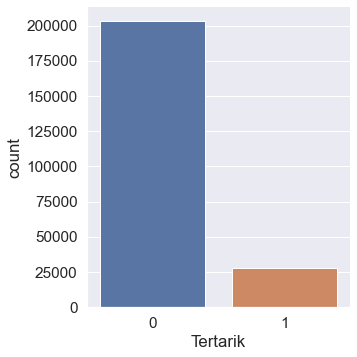

In [70]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [71]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [72]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy='minority', k_neighbors=5)
x_data, y_data = smt.fit_resample(x_data, y_data)


In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (324712, 10)
x_test shape: (81178, 10)
---------------------------------
y_train shape: (324712,)
y_test shape: (81178,)


## **Tuning Model**

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=1000),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'AdaBoost',
    'Random Forest',
    'XGB Classifier'
]


In [76]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [77]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 89.03
Akurasi model Logistic Regression: 77.93
Akurasi model AdaBoost: 82.28
Akurasi model Random Forest: 92.3
Akurasi model XGB Classifier: 90.86


## **Data Validation Evaluation**

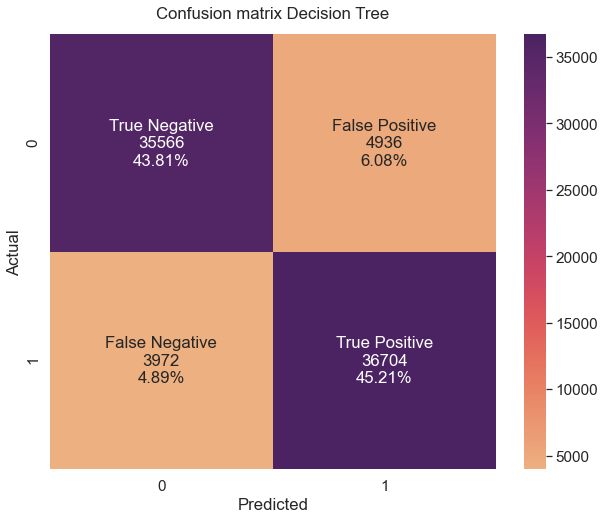


               precision    recall  f1-score   support

           0       0.90      0.88      0.89     40502
           1       0.88      0.90      0.89     40676

    accuracy                           0.89     81178
   macro avg       0.89      0.89      0.89     81178
weighted avg       0.89      0.89      0.89     81178




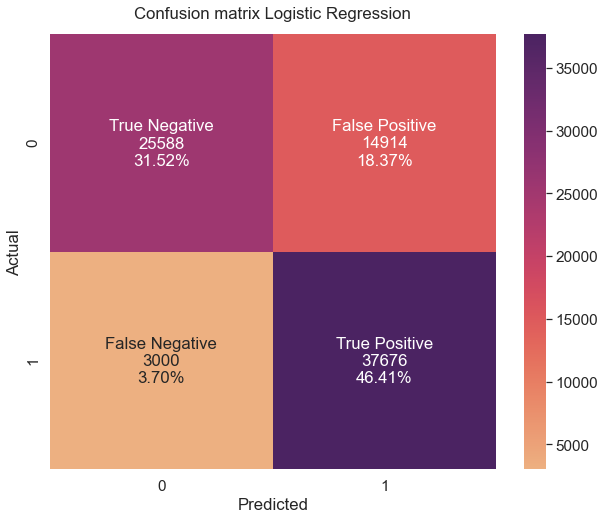


               precision    recall  f1-score   support

           0       0.90      0.63      0.74     40502
           1       0.72      0.93      0.81     40676

    accuracy                           0.78     81178
   macro avg       0.81      0.78      0.77     81178
weighted avg       0.81      0.78      0.77     81178




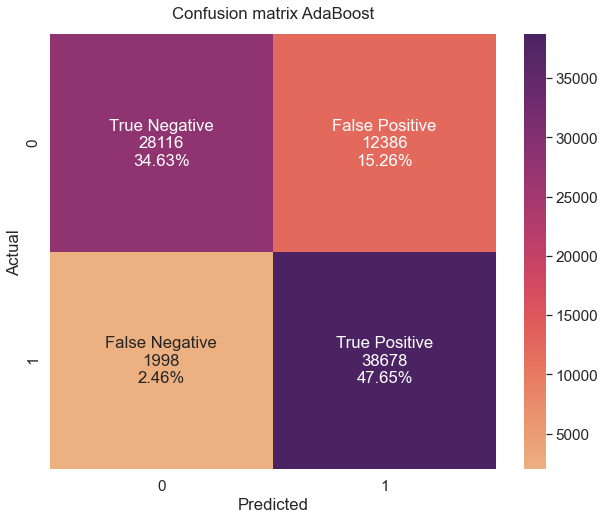


               precision    recall  f1-score   support

           0       0.93      0.69      0.80     40502
           1       0.76      0.95      0.84     40676

    accuracy                           0.82     81178
   macro avg       0.85      0.82      0.82     81178
weighted avg       0.85      0.82      0.82     81178




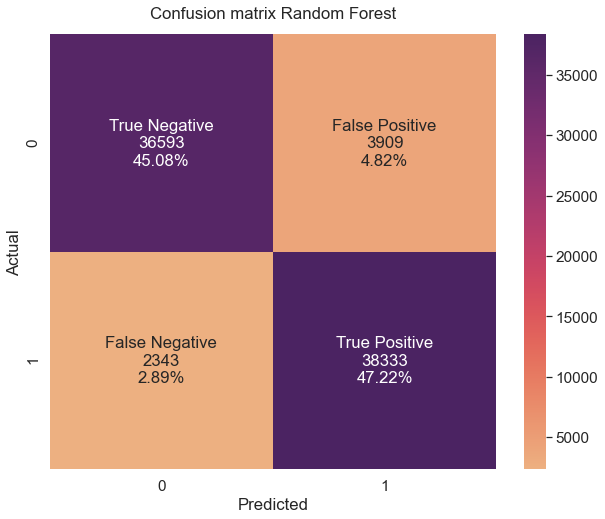


               precision    recall  f1-score   support

           0       0.94      0.90      0.92     40502
           1       0.91      0.94      0.92     40676

    accuracy                           0.92     81178
   macro avg       0.92      0.92      0.92     81178
weighted avg       0.92      0.92      0.92     81178




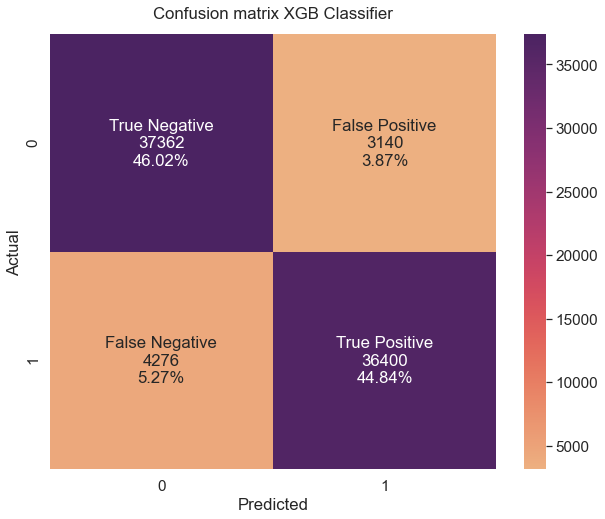


               precision    recall  f1-score   support

           0       0.90      0.92      0.91     40502
           1       0.92      0.89      0.91     40676

    accuracy                           0.91     81178
   macro avg       0.91      0.91      0.91     81178
weighted avg       0.91      0.91      0.91     81178




In [78]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result) 
    plt.figure(figsize=(10, 8))
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='flare')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()
    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)


## **Validation Test**

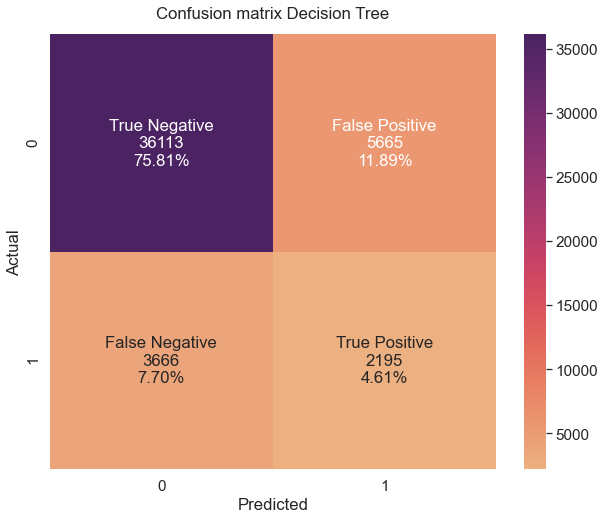


               precision    recall  f1-score   support

           0       0.91      0.86      0.89     41778
           1       0.28      0.37      0.32      5861

    accuracy                           0.80     47639
   macro avg       0.59      0.62      0.60     47639
weighted avg       0.83      0.80      0.82     47639




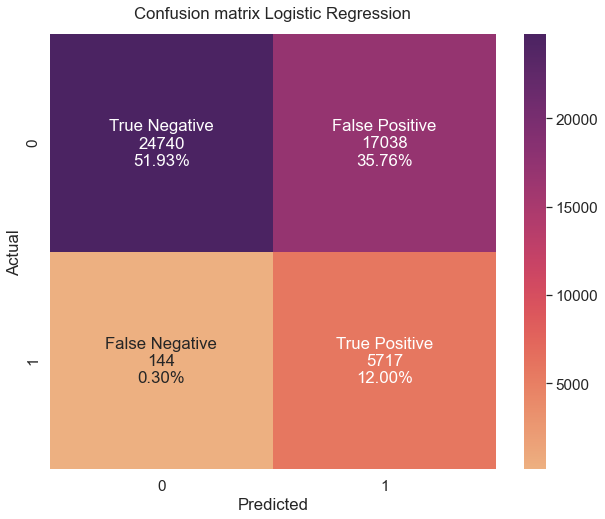


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




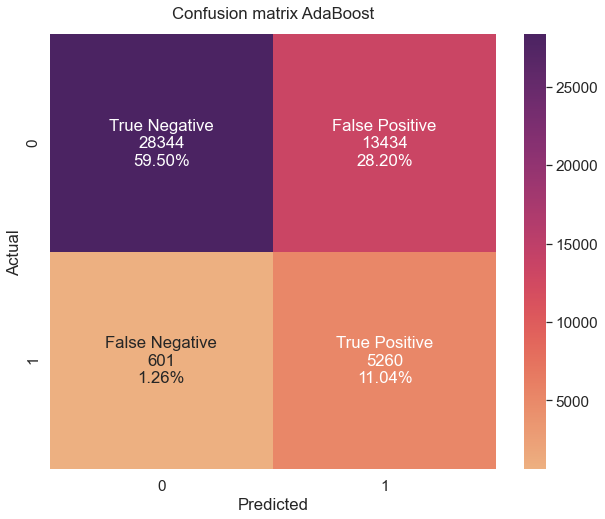


               precision    recall  f1-score   support

           0       0.98      0.68      0.80     41778
           1       0.28      0.90      0.43      5861

    accuracy                           0.71     47639
   macro avg       0.63      0.79      0.61     47639
weighted avg       0.89      0.71      0.76     47639




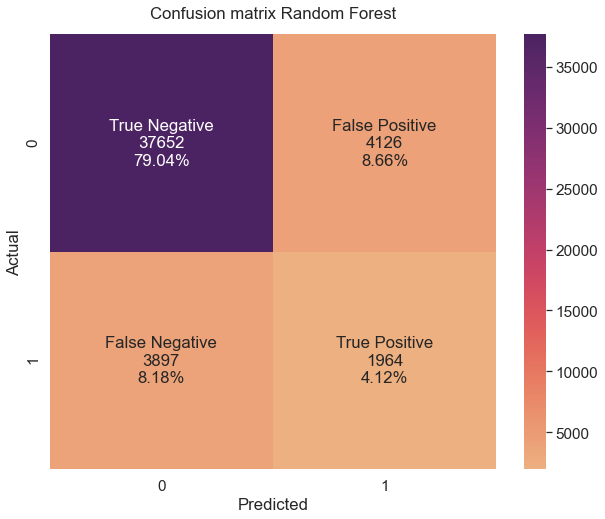


               precision    recall  f1-score   support

           0       0.91      0.90      0.90     41778
           1       0.32      0.34      0.33      5861

    accuracy                           0.83     47639
   macro avg       0.61      0.62      0.62     47639
weighted avg       0.83      0.83      0.83     47639




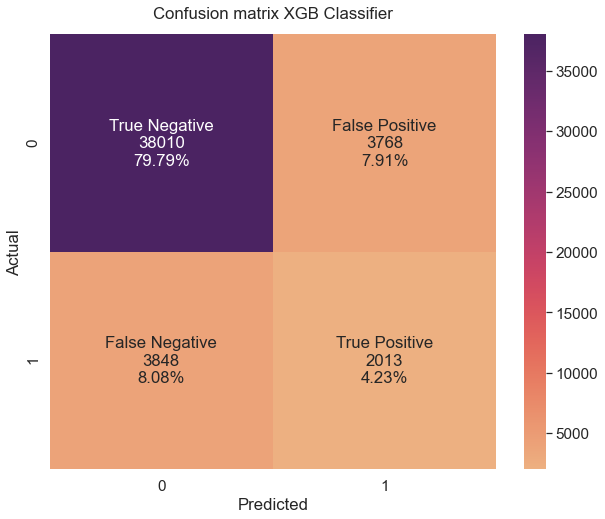


               precision    recall  f1-score   support

           0       0.91      0.91      0.91     41778
           1       0.35      0.34      0.35      5861

    accuracy                           0.84     47639
   macro avg       0.63      0.63      0.63     47639
weighted avg       0.84      0.84      0.84     47639




In [79]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

for models, i in zip(classifier, name):
    report(models, i)


In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
CV_rfc.fit(x_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


KeyboardInterrupt: 